# 第一节：什么是机器学习？

![image.png](Figures/ML_Wikipedia.png)

这是从维基百科上截图的一段，维基百科当然不是百分之一百的正确无误，但是对于一些广为人知的概念的定义部分，应该是不至于出现很大差错的。

这个定义里，关键的部分是“Machine learning (ML) is the study of computer algorithms that can improve automatically through experience and by the use of data. It is seen as a part of artificial intelligence. Machine learning algorithms build a model based on sample data, known as training data, in order to make predictions or decisions without being explicitly programmed to do so.” 说的简单一点，机器学习是一种“数据驱动”的算法，基于样本数据来进行预测或者做出判断，其规则并不显式写入程序之内。

## 那么，一个简单的例子：线性回归

请大家回想一下中学学过的线性回归，是否也满足这个定义？

- 线性回归中，如果我们理解成两步：
    1. 第一步利用已有数据求出系数（从而没有显式地给出判断标准）
    2. 第二步利用系数进行预测/判断等... 

可以看出，线性回归是满足我们对机器学习的定义的。并且，在维基百科中，线性回归也被归为了机器学习模型的一种。

![image.png](Figures/LinearReg_Wikipedia.png)



事实上，将线性回归，或者更基本的，“线性模型”，作为机器学习模型的一种，并不仅仅是维基百科的独创。

![image.png](Figures/Watermelon.png)

在南京大学周志华教授这本著名的机器学习中文教材《机器学习》（又名“西瓜书”）中，线性模型就被放在了第三章的重要位置，且被给予了高度评价。

## 一个例子：单摆

相信每位同学提到单摆，都会想到一条著名的公式：
$$
T = 2\pi \sqrt{\frac{l}{g}}
$$
式中，$T$是单摆的周期，$l$是单摆摆长，$g$是重力加速度。

在经典物理中万有引力、重力等理论建立起来后，我们能够轻松的计算出单摆在更大角度下的周期，能够制造出各种复杂的摆...

但在我们建立理论之前，该如何研究呢？

<img src="Figures/Pendulum.png" alt="Drawing" width=1000/>

这是一张来自维基百科的截图，从中可以看出，单摆应用为计时工具的时间节点，甚至早于力学理论的建立。也就是说，单摆的建立，完全是经验性的公式。

现在请各位想象，在中学时代，可能或多或少都有机会接触到小角度单摆这样的物理实验，可能是观察自己的老师的演示，可能是观察家里的挂钟钟摆，或者被要求亲自动手实验。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.ROOT)

1. 如果设备比较好，例如可以用秒表计时，尺子的精度也很高，那么就会发现，摆长与周期的关系会比较清晰

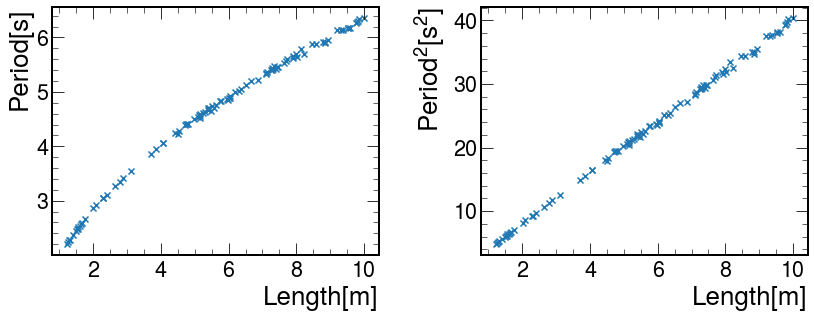

In [2]:
lT_fine = np.loadtxt("TextData/lT_fine.dat")
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(lT_fine[:,0],lT_fine[:,1],marker='x')
plt.xlabel("Length[m]")
plt.ylabel("Period[s]")
plt.subplot(122)
plt.scatter(lT_fine[:,0],lT_fine[:,1]**2,marker='x')
plt.xlabel("Length[m]")
plt.ylabel("Period$^2$[s$^2$]")
plt.tight_layout()

2. 如果设备比较差，例如用脉搏来计时，用拃来度量长度，那么测量误差较大，摆长和周期的关系就难以判断

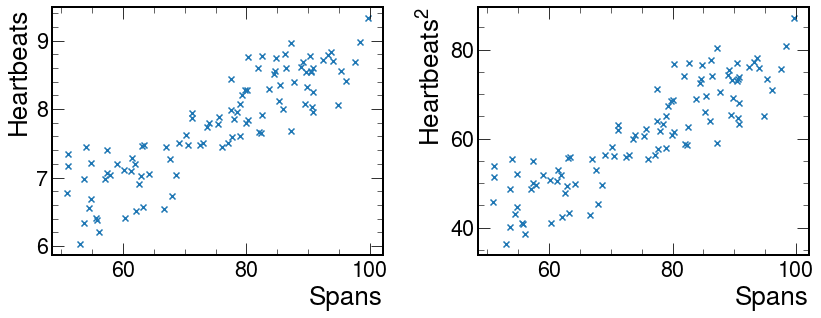

In [3]:
lT_coarse = np.loadtxt("TextData/lT_coarse.dat")
plt.figure(figsize = (12,5))
plt.subplot(121)
plt.scatter(lT_coarse[:,0],lT_coarse[:,1],marker='x')
plt.xlabel("Spans")
plt.ylabel("Heartbeats")
plt.subplot(122)
plt.scatter(lT_coarse[:,0],lT_coarse[:,1]**2,marker='x')
plt.xlabel("Spans")
plt.ylabel("Heartbeats$^2$")
plt.tight_layout()

这行公式是我从高中课本中抄下来的最小二乘法公式，

![image.png](Figures/OLS.png)

利用这些公式，我们不难通过一些简单的python代码计算出最小二乘法的结果。

Text(0, 1, 'Period$^2$[s$^2$]')

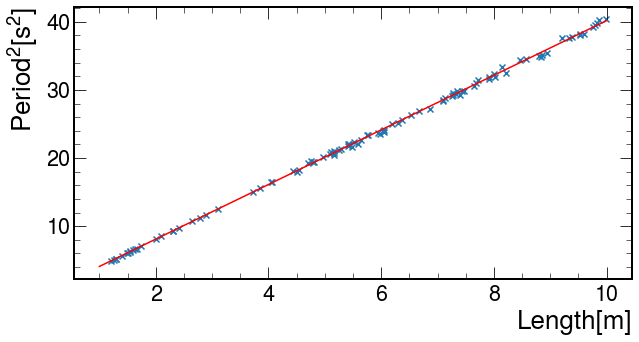

In [4]:
mean_x = np.mean(lT_fine[:,0])
mean_x2 = np.mean(lT_fine[:,0]**2)
mean_xy = np.mean(lT_fine[:,0] * lT_fine[:,1]**2)
mean_y = np.mean(lT_fine[:,1]**2)
n = len(lT_fine)
b_hat = (mean_xy * n - n*mean_x*mean_y) / (mean_x2 * n - n * mean_x**2)
a_hat = mean_y - b_hat * mean_x

x4plot = np.linspace(1,10)
y4plot = x4plot * b_hat + a_hat
plt.figure(figsize = (10,5))
plt.scatter(lT_fine[:,0],lT_fine[:,1]**2,marker='x')
plt.plot(x4plot,y4plot,"-r")
plt.xlabel("Length[m]")
plt.ylabel("Period$^2$[s$^2$]")

一般来说，测量数据中无可避免的会含有测量误差，这些测量误差又往往是带有随机性质的。因此，线性回归的结果也将带有随机性。这其实也就是线性模型被统计学家研究的原因之一。

不过对于线性回归结果的统计分析并不是我们下一步想给大家介绍的，我们接下来要介绍的部分是多元线性回归。

## 多元线性回归
不知道各位在大学生活中有没有遇到多元线性回归。多元线性回归可能出现的地方有：概率统计课堂，大学物理实验，数学模型比赛......

比如这个例子：

<img src="Figures/MLS_Intro.png" alt="Drawing" width=500/>

其中关键的部分是：

<img src="Figures/MLS_formula.png" alt="Drawing" width=500/>

与

<img src="Figures/MLS_data.png" alt="Drawing" width=500/>

简单来说，如果我们取第二列的坐标，做出回归，那么最后三个回归系数可以运算得出该列最后列出的直径D。

如何计算呢？

形如
$$
\begin{aligned}
 \mathbb{y} &= \mathbb{A}_1 \mathbb{x} + \mathbb{A}_0\\
 &=\mathbb{A} \mathbb{X}&\mathbb{X} = \{\mathbb{x},1\}
\end{aligned}
$$
的多元线性模型，其最小二乘回归系数有着解析形式：
$$
 \hat{\mathbb{A}} = (\mathbb{X}^T\mathbb{X})^{-1}(\mathbb{X}^T\mathbb{y})
$$

我们可以利用这一形式做出计算，例如文章中式子所列

<img src="Figures/MLS_Coef.png" alt="Drawing" width=500/>

不过，因为多元回归的系数表达式更加复杂，在实际应用场景中，人们一般会借助统计软件来完成相关的计算。在这里，我们也给大家介绍一个在python中经常使用的机器学习程序库scikit-learn，简称sklearn，其中包括了多元线性模型。

下面，我们来用sklearn来完成这个线性回归：

In [5]:
from sklearn.linear_model import LinearRegression
X = [[162,174],[164,157],[179,137],[192,129],[215,128],[232,136],[242,147],[249,170]]
y = [x[0]**2 + x[1]**2 for x in X]
reg = LinearRegression().fit(X,y)
coef = reg.coef_
inter = reg.intercept_
D = 2 * np.sqrt(inter + coef[0]**2 / 4 + coef[1]**2 / 4)
D

87.11156990485621

首先，我想请大家检查一下结果，是否和我们计算得出的相同？

其次，我想请大家留意一下sklearn中这个线性回归的语法。事实上，sklearn中的所有模型，都会使用这样的`fit`等函数名作为接口。这一约定俗称的函数名定义，被广泛的运用到了各种机器学习package中，例如接下来要介绍的xgboost, keras等。

## 逻辑回归
在我们正式开赴下一部分前，有必要为大家介绍一下逻辑回归的概念。如果我们想要通过数据拟合出连续变化的变量，例如通过绳子的长度判断其小角度单摆的周期，或者是预测塞曼效应的花样，我们可以很自然的使用最小二乘法来进行构造。

<!-- 利用线性模型进行回归是一个大家容易接受的想法，我们在物理中遇到了太多的线性模型，甚至于许多理论都来自于模型的泰勒展开，所以理所当然会有线性项。

但是大家在进行最小二乘法的时候有没有思考过一个问题：为什么最后的偏差是以平方项被考虑呢？为什么没有很多讨论最小一乘法呢？ -->

但是，如果我们想要进行分类问题，我们应该如何选择何种手段呢？下图是一个分类问题的例子，如果我们想要识别出图片中的手写数字，我们模型的预测值将不可避免的变得离散化。如何能够完成这样一个任务呢？

![MNIST](./mnist.jpg)

让我们将问题进行简化：
- 我们希望进行一个二分类问题
- 我们考虑的模型有两个自变量

例如，我们在沙漠中发现了一艘外星人飞船，他们的笔记里写了他们在两个外星球上做单摆实验的（摆长，周期）数据，但是因为字迹潦草和污损，有许多数据中的记录有缺失，令我们无法判断出这些数据来自于哪一类

Text(0, 1, '$x_2: Period^2$')

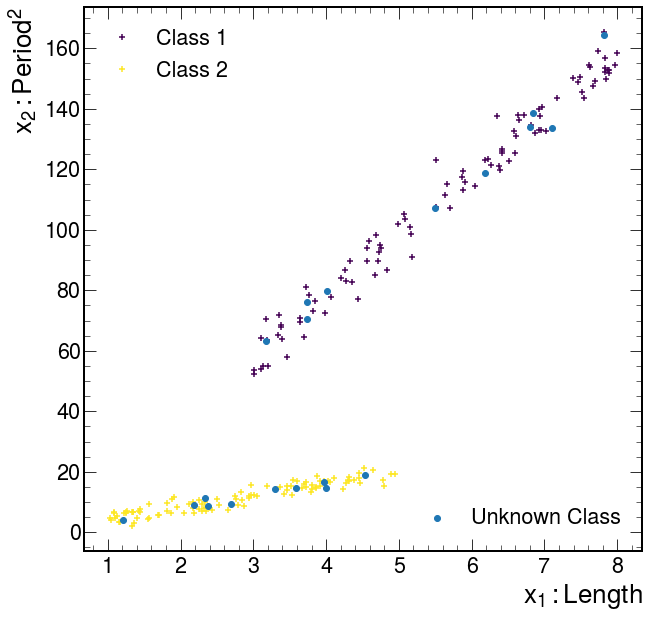

In [6]:
known = np.loadtxt("TextData/known.dat")
unknown = np.loadtxt("TextData/unknown.dat")
fig, ax = plt.subplots()
scatter = ax.scatter(known[:,0],known[:,1],c=(known[:,2].astype(int)),marker="+")
scatter1 = ax.scatter(unknown[:,0],unknown[:,1],marker="o",label="Unknown Class")
legend1 = ax.legend(*scatter.legend_elements(fmt="Class {x:.0f}",func = lambda c:c+1.))
ax.add_artist(legend1)
plt.legend(loc="lower right")
ax.set_xlabel("$x_1: Length$")
ax.set_ylabel("$x_2: Period^2$")

像上图中的情况，一个解决方案，是先画出这个图，然后在图里画出一条线，再通过判断数据点在这个图的哪一边作为结果。

Text(0, 1, '$x_2: Period^2$')

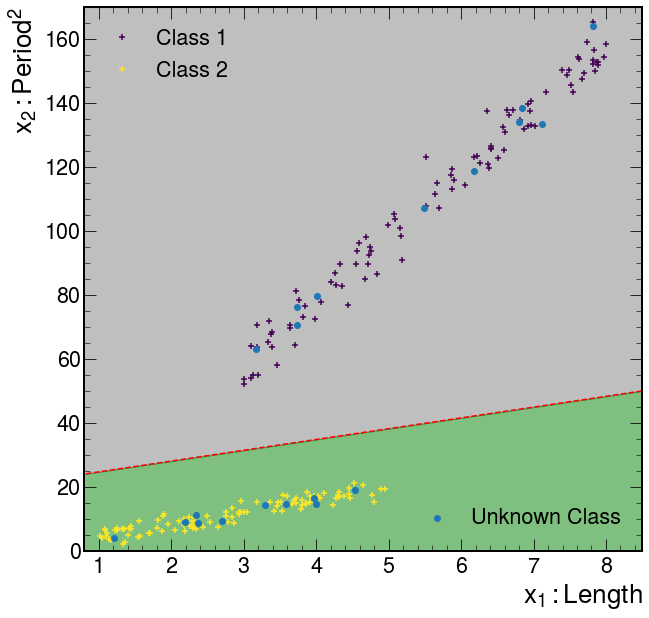

In [7]:
fig, ax = plt.subplots()
x4plot1 = np.linspace(0.5,8.5)
y4plot1 = x4plot*3 + 20
plt.plot(x4plot1,y4plot1,"--r")
plt.fill_between(x4plot1,y4plot1,170,alpha = 0.5,color="gray")
plt.fill_between(x4plot1,0,y4plot1,alpha = 0.5,color="green")
scatter = ax.scatter(known[:,0],known[:,1],c=(known[:,2].astype(int)),marker="+")
scatter1 = ax.scatter(unknown[:,0],unknown[:,1],marker="o",label="Unknown Class")
legend1 = ax.legend(*scatter.legend_elements(fmt="Class {x:.0f}",func = lambda c:c+1.))
ax.add_artist(legend1)
plt.legend(loc="lower right")
plt.xlim(0.8,8.5)
plt.ylim(0,170)
ax.set_xlabel("$x_1: Length$")
ax.set_ylabel("$x_2: Period^2$")

假设这条线是$\mathbf{a}\cdot\mathbf{x}+b=0$，理想的目标函数则可以写作一个阶跃函数的形式：

$$
F(\mathbf{x})=\begin{cases}
0, & \mathbf{a}\cdot\mathbf{x}+b < 0 \\ 
0.5, & \mathbf{a}\cdot\mathbf{x}+b = 0 \\
1, & \mathbf{a}\cdot\mathbf{x}+b > 0
\end{cases}
$$

不过，正如我们在物理中会考虑一些光滑函数近似这些不连续的函数，在利用线性模型做分类问题时，大家也会考虑使用逻辑函数取代阶跃函数，逻辑函数的行为是
$$
F_l(\mathbf{x}) = \frac{1}{1+\exp(-\mathbf{a}\cdot\mathbf{x}-b)}
$$

如果画出来则是下面的效果（阶跃函数存在可视化的问题）

Text(0, 1, 'score')

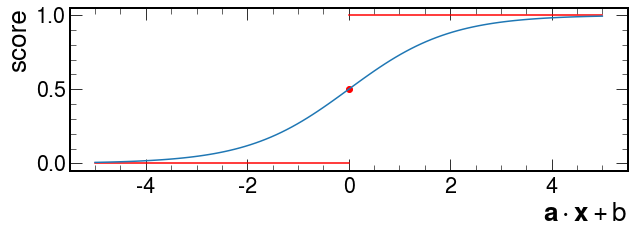

In [8]:
x4plot2_1 = np.linspace(-5,0)
x4plot2_2 = np.linspace(0,5)
x4plot2 = np.hstack([x4plot2_1,x4plot2_2])
y4plot2_1 = np.heaviside(x4plot2_1,0)
y4plot2_2 = np.heaviside(x4plot2_2,1)
y4plot2= 1 / (1 + np.exp(-1*x4plot2))
plt.figure(figsize=(10,3))
plt.plot(x4plot2_1,y4plot2_1,"-r")
plt.plot(x4plot2_2,y4plot2_2,"-r")
plt.plot(x4plot2,y4plot2)
plt.scatter(0,0.5,color="r")
plt.xlabel("$\mathbf{a}\cdot\mathbf{x}+b$")
plt.ylabel("score")

逻辑回归的求解一般需要用到数值优化，在Sklearn里则有现成的实现可供调用

Text(0, 1, '$x_2: Period^2$')

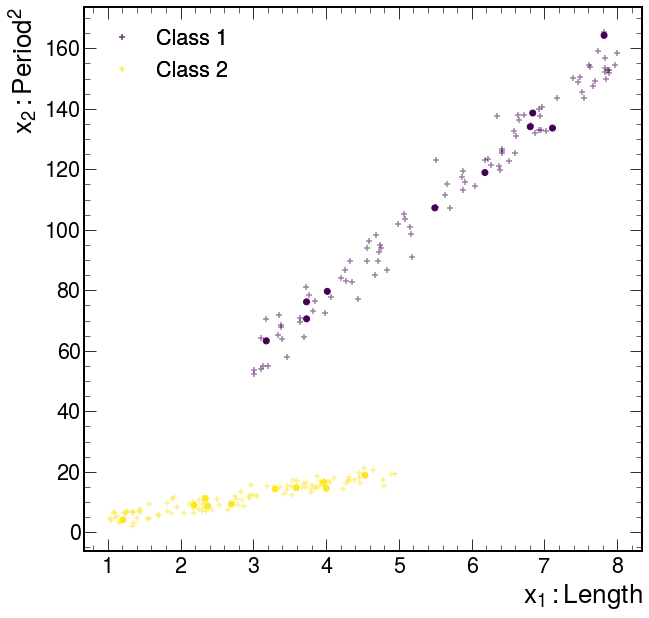

In [9]:
from sklearn.linear_model import LogisticRegression
np.random.shuffle(known)
X_known = known[:,0:2]
y_known = known[:,2] == 1
clf = LogisticRegression(random_state=0,penalty="none",max_iter=100).fit(X_known, y_known)

unknown_pred = clf.predict(unknown[:,0:2])
fig, ax = plt.subplots()
scatter = ax.scatter(known[:,0],known[:,1],c=(known[:,2].astype(int)),marker="+",alpha = 0.5)
scatter1 = ax.scatter(unknown[:,0],unknown[:,1],c=unknown_pred,marker="o",label="Unknown Class")
legend1 = ax.legend(*scatter.legend_elements(fmt="Class {x:.0f}",func = lambda c:c+1.))
ax.add_artist(legend1)
ax.set_xlabel("$x_1: Length$")
ax.set_ylabel("$x_2: Period^2$")

可以看到，我们运用逻辑回归，成功的将未知类别的数据归类为其应有的类别中。